In [1]:
import torch
import pyro
from torch.utils.data import DataLoader, random_split, TensorDataset
import numpy as np
import os
from cities.utils.data_grabber import find_repo_root
from cities.utils.data_loader import ZoningDataset
from cities.modeling.evaluation import prep_data_for_test, test_performance

from cities.modeling.simple_linear import SimpleLinear
from cities.modeling.svi_inference import run_svi_inference
from pyro.infer import Predictive
from chirho.robust.handlers.predictive import PredictiveModel


import matplotlib.pyplot as plt
import seaborn as sns

root = find_repo_root()

[iteration 0001] loss: 385.7477
[iteration 0050] loss: 314.1341
[iteration 0100] loss: 255.5700
[iteration 0150] loss: 243.7830
[iteration 0200] loss: 237.0721
[iteration 0250] loss: 229.5809
[iteration 0300] loss: 229.1864
[iteration 0350] loss: 234.4076
[iteration 0400] loss: 229.4427
[iteration 0450] loss: 231.8016
[iteration 0500] loss: 237.8151
[iteration 0550] loss: 235.2099
[iteration 0600] loss: 230.1523


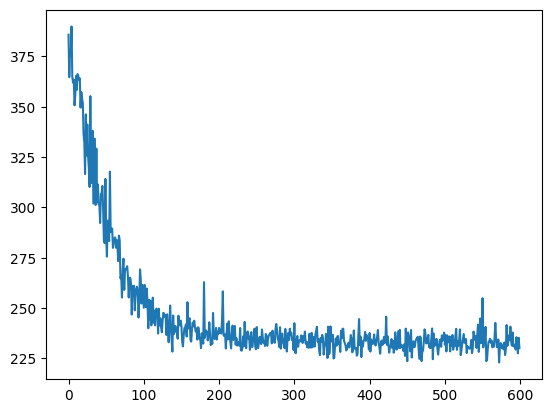

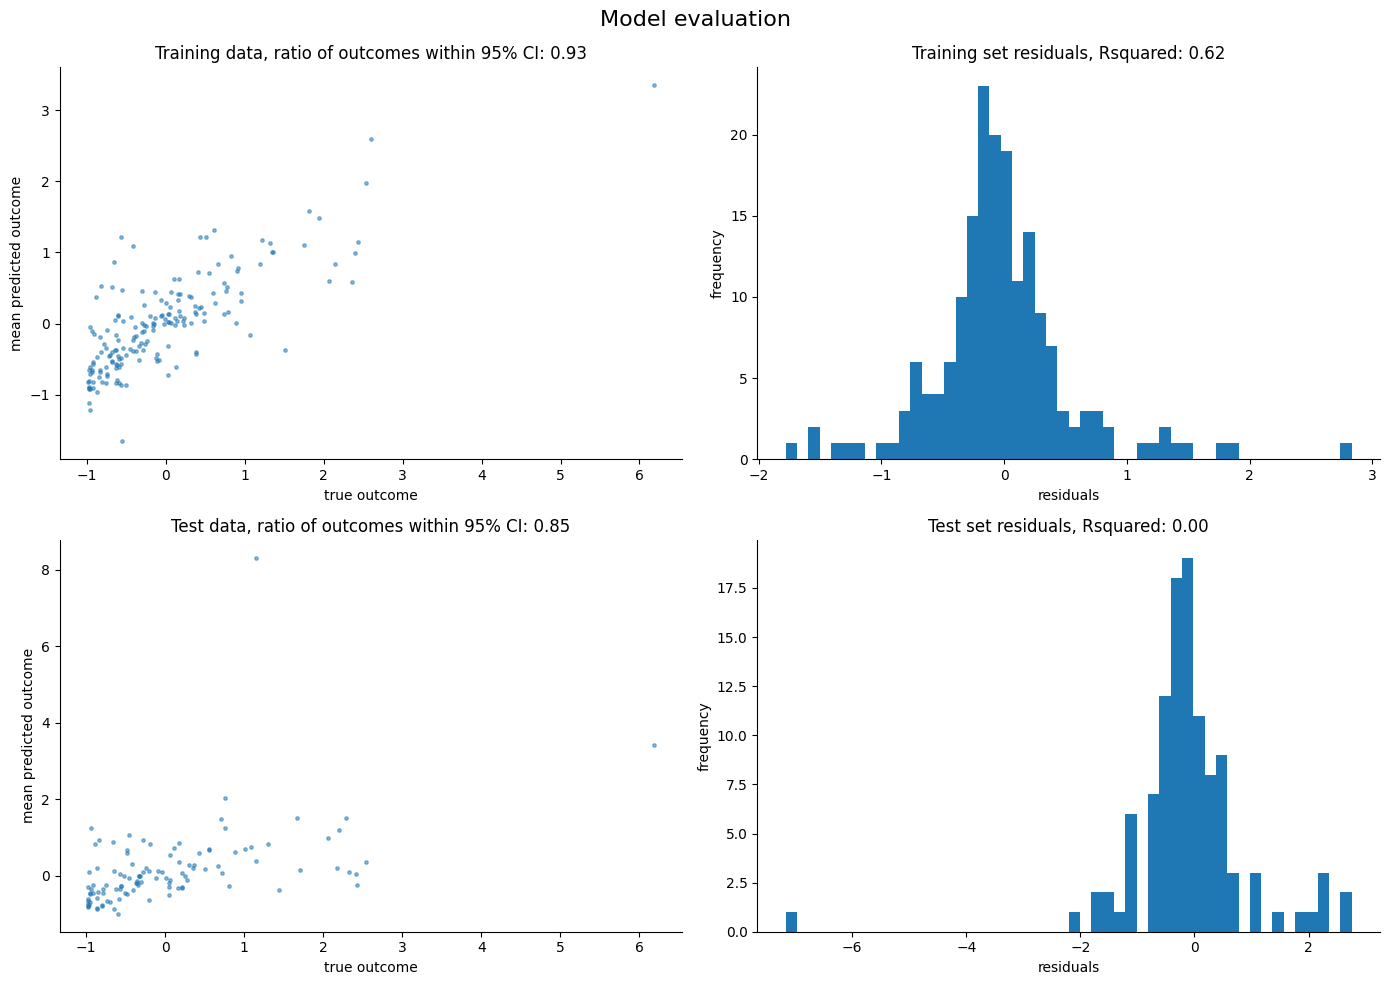

{'mae_train': 0.3836000859737396,
 'mae_test': 0.6547335386276245,
 'rsquared_train': tensor(0.6211),
 'rsquared_test': tensor(0.0031),
 'coverage_train': 0.9337016344070435,
 'coverage_test': 0.8468468189239502}

In [2]:
train_loader, test_loader, categorical_levels = prep_data_for_test(train_size=0.6)

kwarg_names = {
    "categorical": ["limit_id", "neighborhood_id"],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)

[iteration 0001] loss: 255.7051
[iteration 0050] loss: 243.7353
[iteration 0100] loss: 243.5965
[iteration 0150] loss: 243.2553
[iteration 0200] loss: 243.6348
[iteration 0250] loss: 243.4230
[iteration 0300] loss: 243.7865
[iteration 0350] loss: 244.1160
[iteration 0400] loss: 242.9362
[iteration 0450] loss: 241.9022
[iteration 0500] loss: 243.2849
[iteration 0550] loss: 244.0677
[iteration 0600] loss: 244.4781


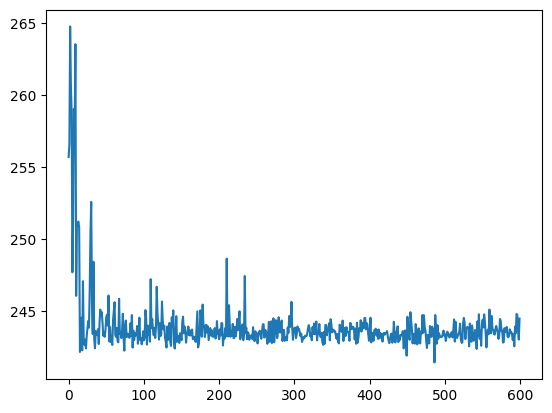

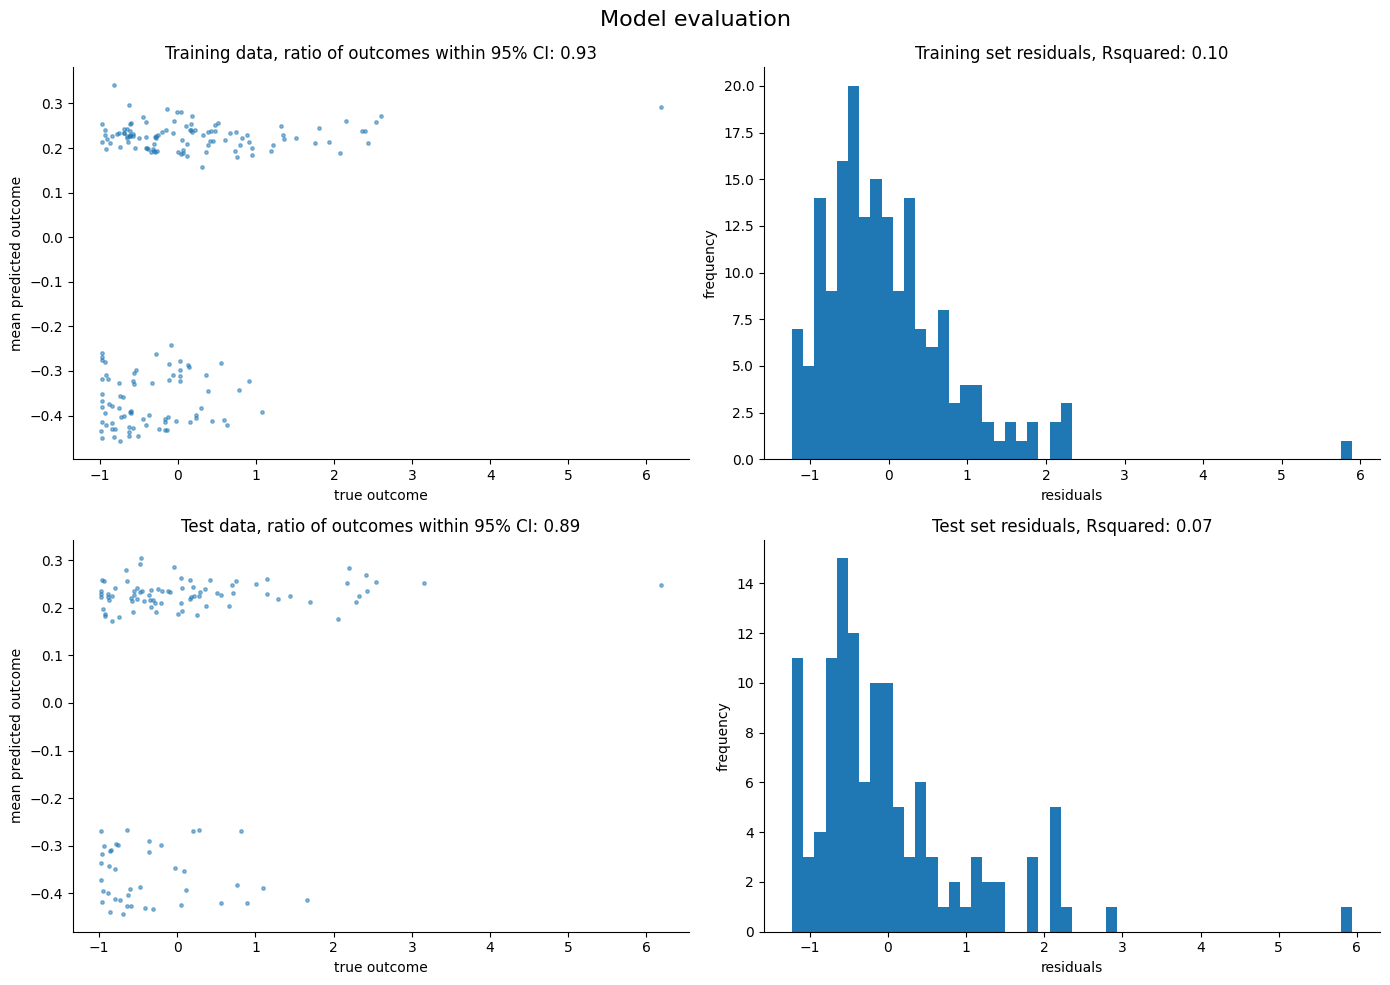

{'mae_train': 0.6349726915359497,
 'mae_test': 0.7535908222198486,
 'rsquared_train': tensor(0.1027),
 'rsquared_test': tensor(0.0671),
 'coverage_train': 0.9337016344070435,
 'coverage_test': 0.8925619721412659}

In [3]:
# note just using limit id without parcel size is not very good

pyro.clear_param_store()

limit_kwarg_names = {
    "categorical": ["limit_id"],
    "continuous": {},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear,
    limit_kwarg_names,
    train_loader,
    test_loader,
    categorical_levels,
    plot=True,
)

[iteration 0001] loss: 359.8813
[iteration 0050] loss: 266.1093
[iteration 0100] loss: 239.5120
[iteration 0150] loss: 234.1773
[iteration 0200] loss: 238.6540
[iteration 0250] loss: 229.7818
[iteration 0300] loss: 236.6085
[iteration 0350] loss: 228.2709
[iteration 0400] loss: 226.5295
[iteration 0450] loss: 230.8378
[iteration 0500] loss: 231.4536
[iteration 0550] loss: 230.5530
[iteration 0600] loss: 233.6349


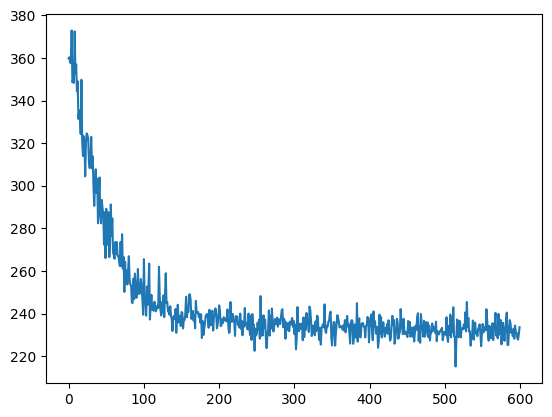

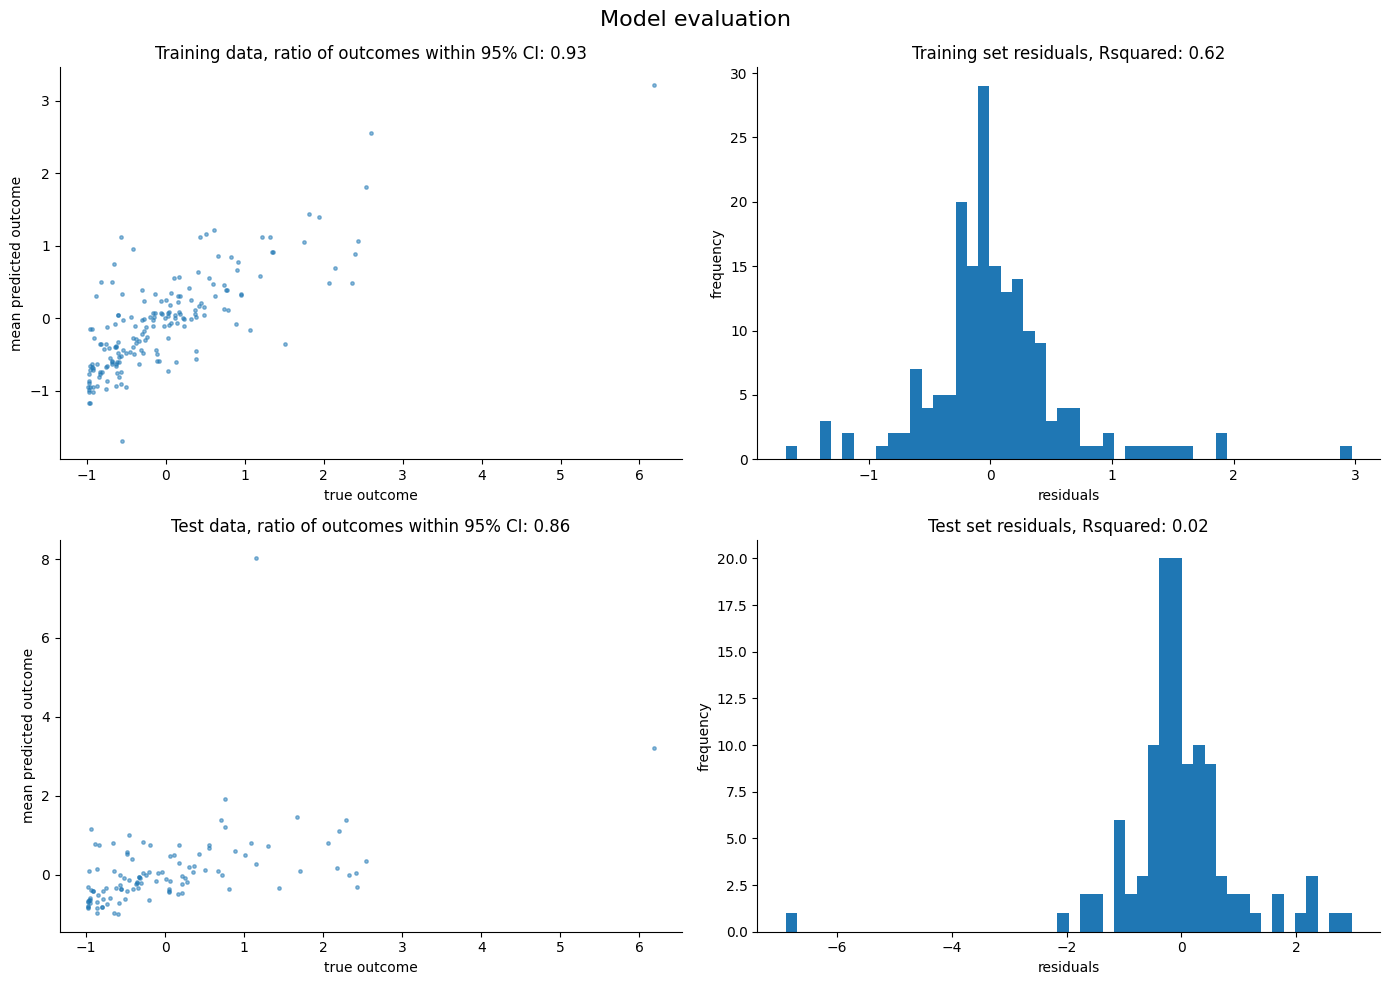

{'mae_train': 0.3748888373374939,
 'mae_test': 0.6441045999526978,
 'rsquared_train': tensor(0.6232),
 'rsquared_test': tensor(0.0239),
 'coverage_train': 0.9281768202781677,
 'coverage_test': 0.8648648858070374}

In [4]:
# adding information about year, not much improvement 

kwarg_names = {
    "categorical": ["limit_id", "neighborhood_id", 'year_id'],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)

[iteration 0001] loss: 850.8749
[iteration 0050] loss: 317.5032
[iteration 0100] loss: 255.1570
[iteration 0150] loss: 239.1964
[iteration 0200] loss: 236.6487
[iteration 0250] loss: 236.0909
[iteration 0300] loss: 237.9539
[iteration 0350] loss: 229.5635
[iteration 0400] loss: 233.0453
[iteration 0450] loss: 234.7802
[iteration 0500] loss: 231.7345
[iteration 0550] loss: 237.5185
[iteration 0600] loss: 228.9982


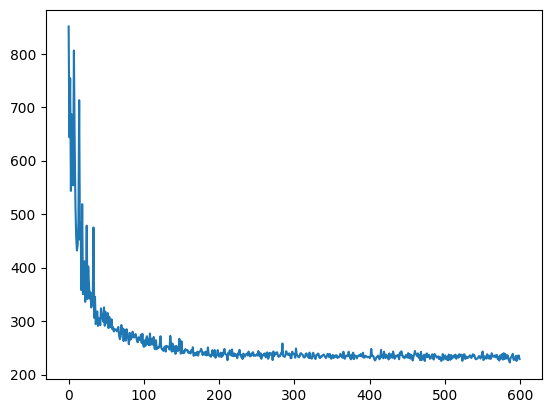

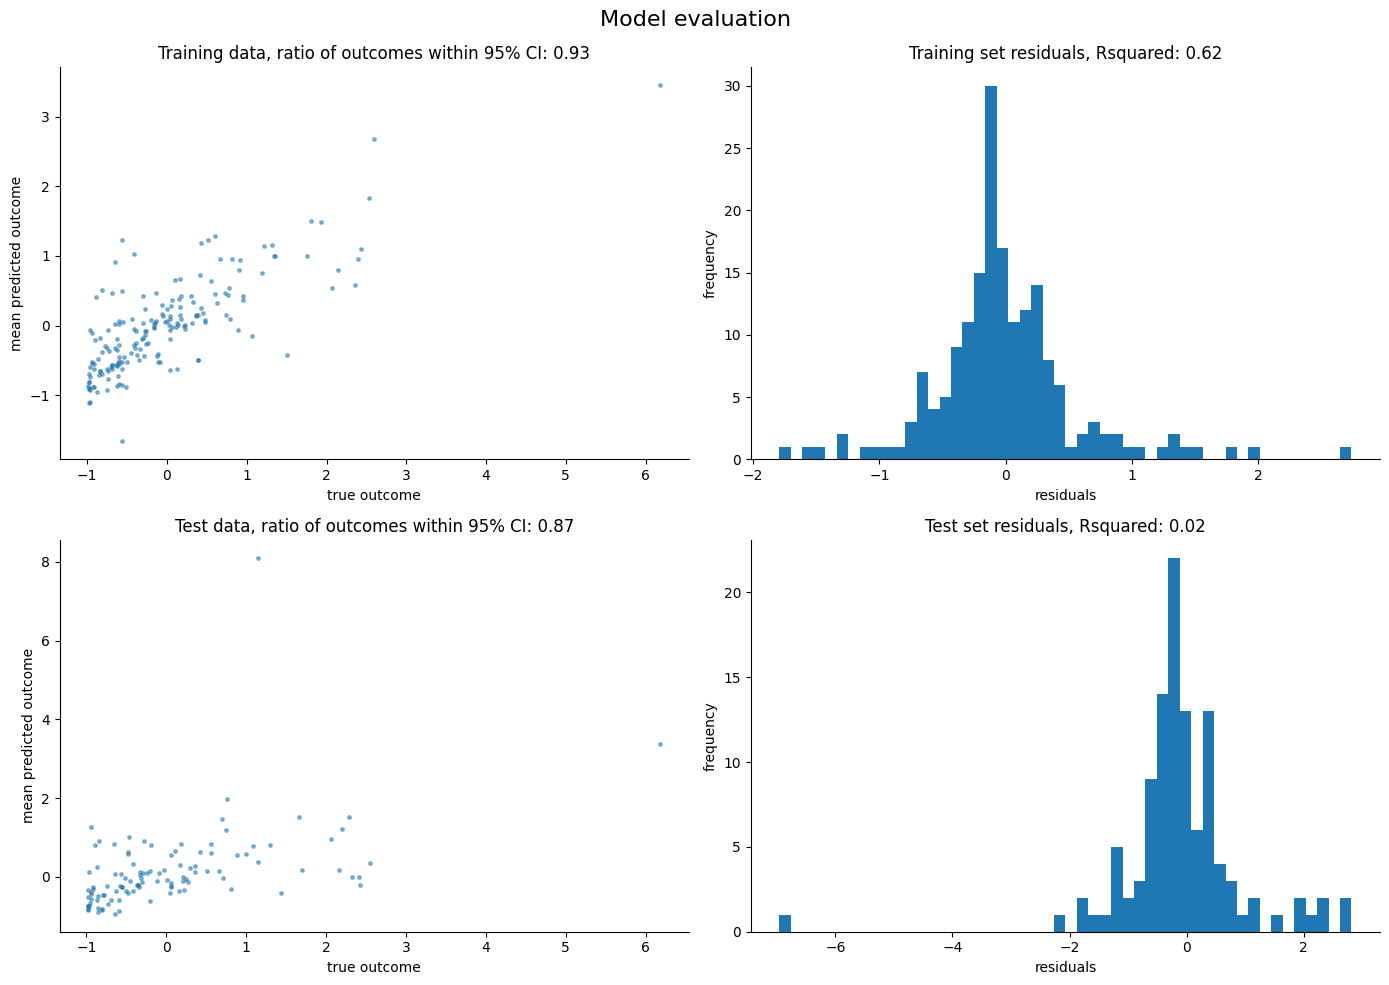

{'mae_train': 0.38870400190353394,
 'mae_test': 0.6542345285415649,
 'rsquared_train': tensor(0.6171),
 'rsquared_test': tensor(0.0191),
 'coverage_train': 0.9281768202781677,
 'coverage_test': 0.8738738894462585}

In [5]:
# add month to linear model itself. no gain, quite the opposite

kwarg_names = {
    "categorical": ["limit_id", "neighborhood_id", 'year_id', 'month_id'],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)


[iteration 0001] loss: 423.9034
[iteration 0050] loss: 285.0976
[iteration 0100] loss: 255.4572
[iteration 0150] loss: 247.9729
[iteration 0200] loss: 236.2412
[iteration 0250] loss: 235.9931
[iteration 0300] loss: 235.2208
[iteration 0350] loss: 235.1862
[iteration 0400] loss: 231.4861
[iteration 0450] loss: 238.0324
[iteration 0500] loss: 228.0155
[iteration 0550] loss: 230.2370
[iteration 0600] loss: 240.1313


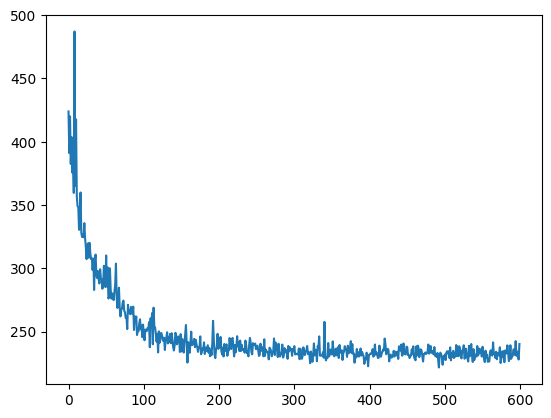

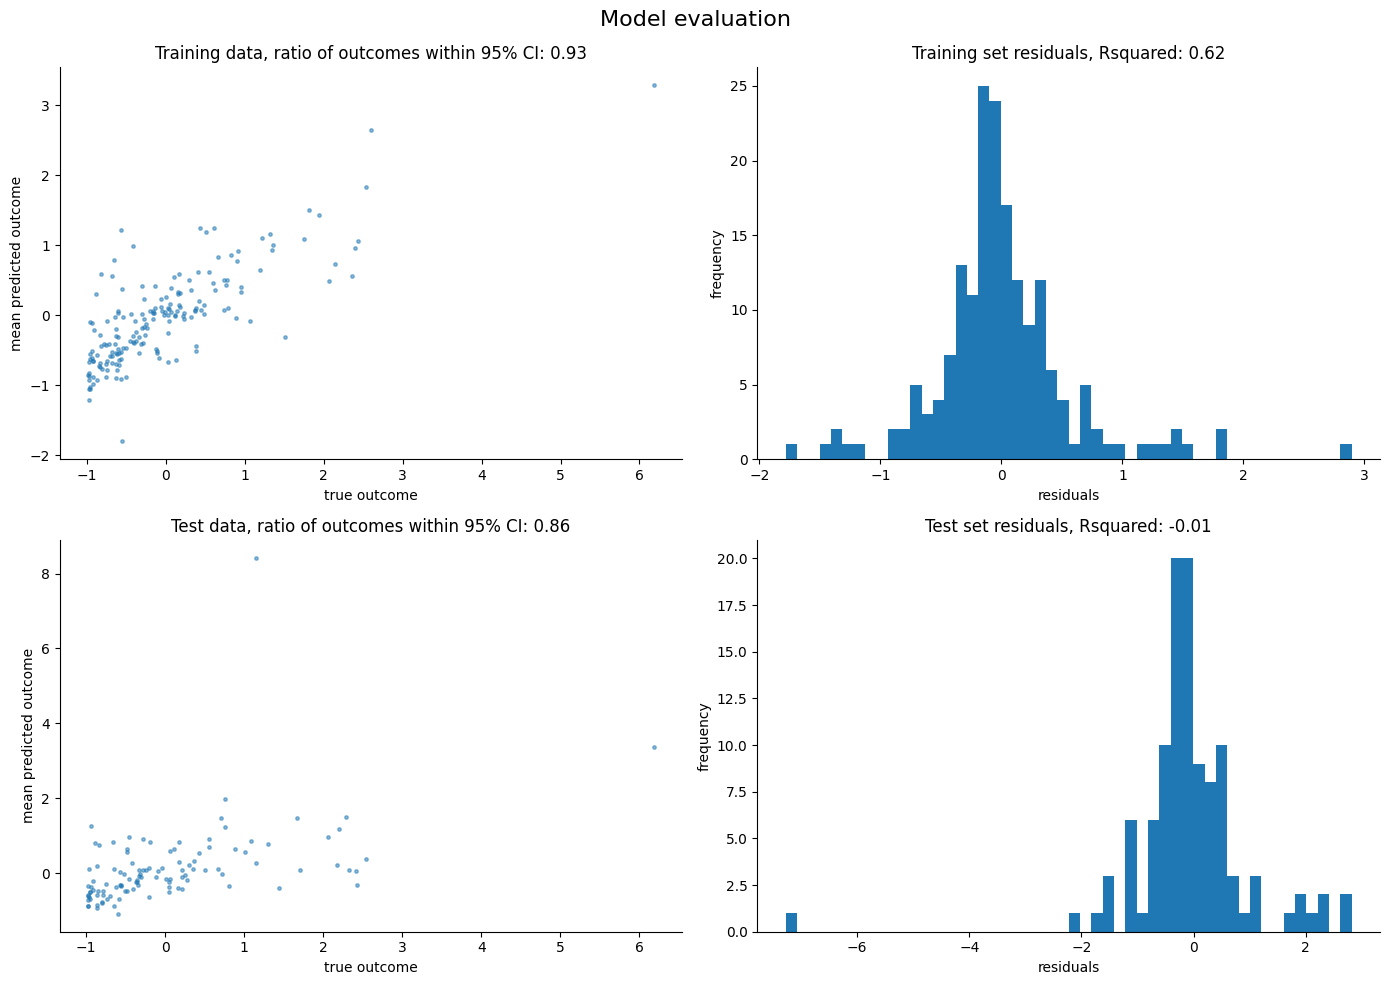

{'mae_train': 0.3789242208003998,
 'mae_test': 0.6517817378044128,
 'rsquared_train': tensor(0.6188),
 'rsquared_test': tensor(-0.0116),
 'coverage_train': 0.9281768202781677,
 'coverage_test': 0.8648648858070374}

In [6]:
# add month drop year to linear model itself. no gain, quite the opposite

kwarg_names = {
    "categorical": ["limit_id", "neighborhood_id", 'month_id'],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)


[iteration 0001] loss: 384.3096
[iteration 0050] loss: 239.2007
[iteration 0100] loss: 212.5201
[iteration 0150] loss: 217.3065
[iteration 0200] loss: 209.8718
[iteration 0250] loss: 212.1469
[iteration 0300] loss: 213.0929
[iteration 0350] loss: 209.0110
[iteration 0400] loss: 212.5148
[iteration 0450] loss: 210.6844
[iteration 0500] loss: 209.7385
[iteration 0550] loss: 213.0420
[iteration 0600] loss: 211.3014


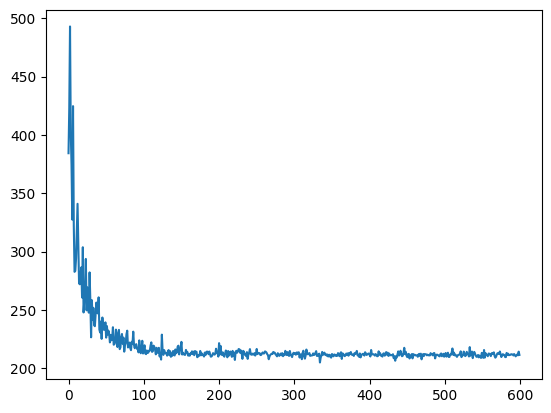

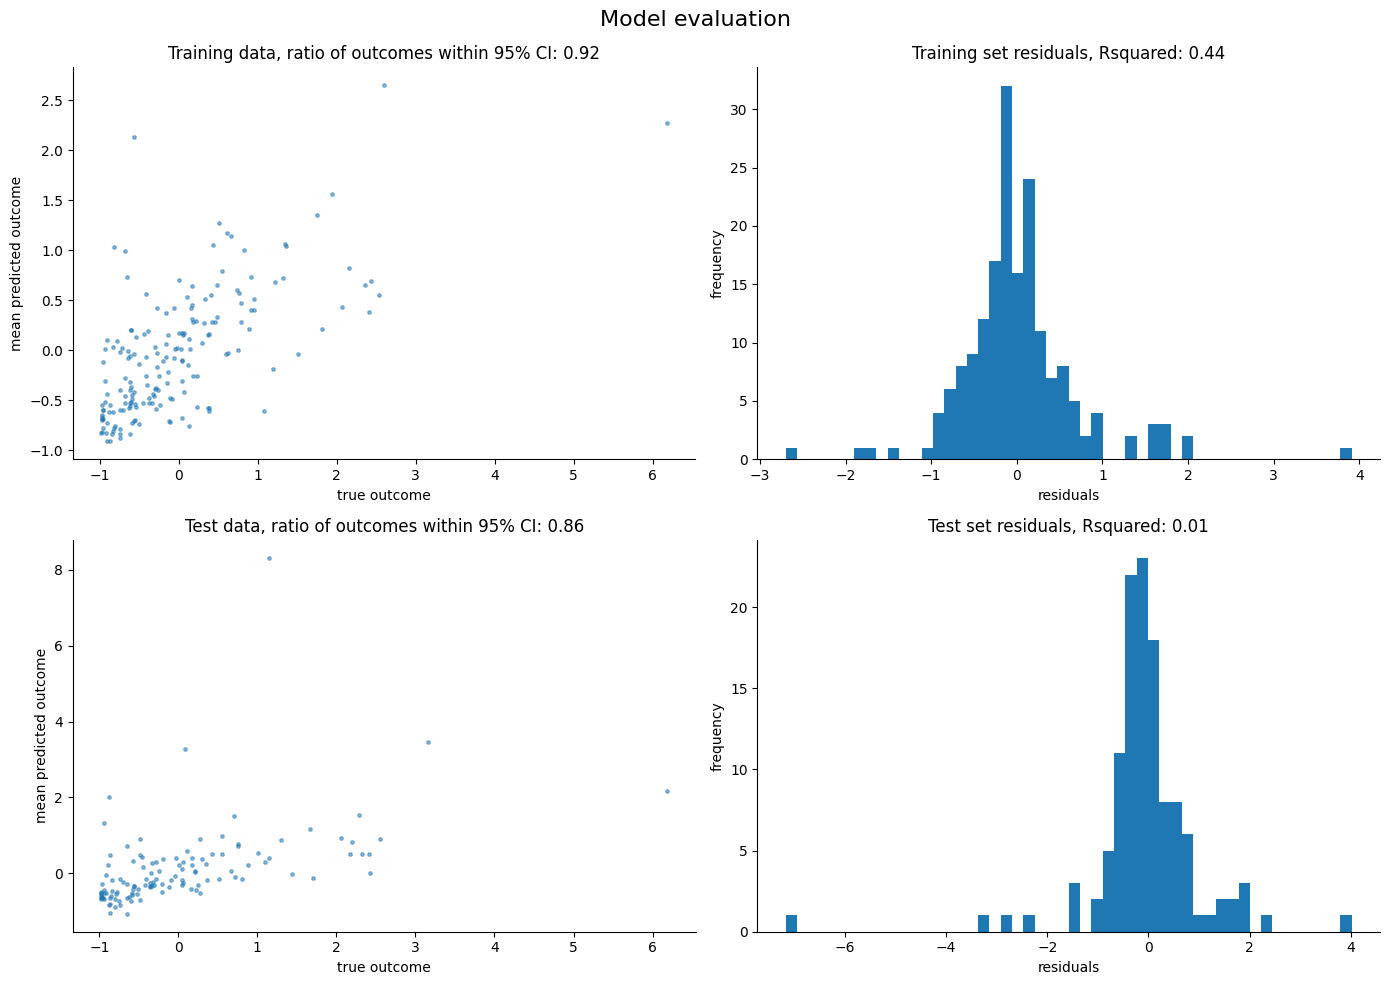

{'mae_train': 0.45458123087882996,
 'mae_test': 0.6197748780250549,
 'rsquared_train': tensor(0.4407),
 'rsquared_test': tensor(0.0085),
 'coverage_train': 0.9171270728111267,
 'coverage_test': 0.8595041036605835}

In [7]:
#switch to zones and past reform


kwarg_names = {
    "categorical": ["zone_id", "year_id", 'month_id', "past_reform"],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)


[iteration 0001] loss: 536.6303
[iteration 0050] loss: 234.1033
[iteration 0100] loss: 228.5404
[iteration 0150] loss: 221.2234
[iteration 0200] loss: 211.3374
[iteration 0250] loss: 212.7973
[iteration 0300] loss: 213.1762
[iteration 0350] loss: 212.8781
[iteration 0400] loss: 211.0961
[iteration 0450] loss: 213.0737
[iteration 0500] loss: 210.9907
[iteration 0550] loss: 210.5549
[iteration 0600] loss: 211.9428


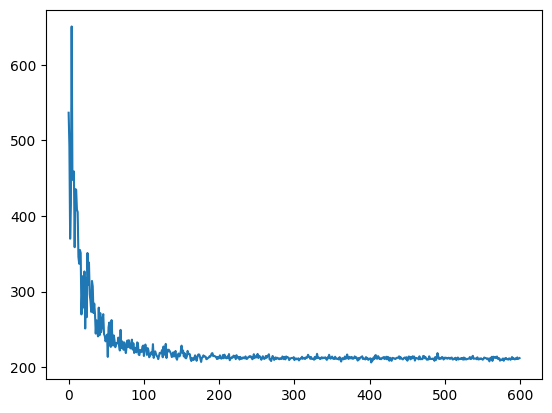

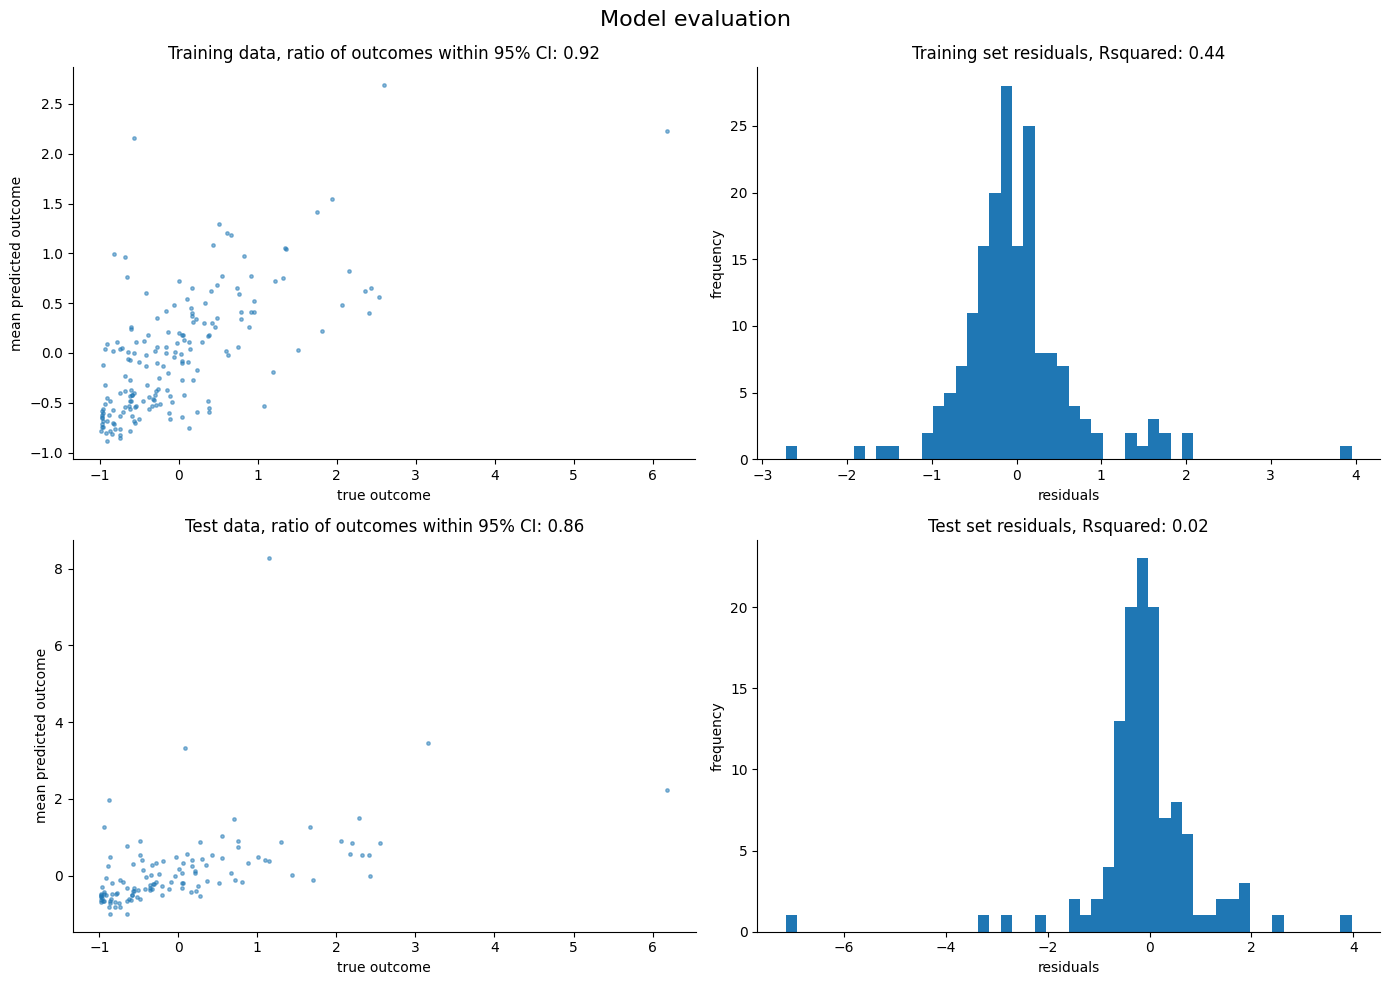

{'mae_train': 0.45764365792274475,
 'mae_test': 0.6193642020225525,
 'rsquared_train': tensor(0.4413),
 'rsquared_test': tensor(0.0184),
 'coverage_train': 0.9171270728111267,
 'coverage_test': 0.8595041036605835}

In [8]:
# drop year as causally up from past reform

kwarg_names = {
    "categorical": ["zone_id", 'month_id', "past_reform"],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)

[iteration 0001] loss: 260.2432
[iteration 0050] loss: 217.1000
[iteration 0100] loss: 215.6780
[iteration 0150] loss: 211.9501
[iteration 0200] loss: 212.2004
[iteration 0250] loss: 214.6218
[iteration 0300] loss: 212.9709
[iteration 0350] loss: 215.0820
[iteration 0400] loss: 209.9030
[iteration 0450] loss: 209.6919
[iteration 0500] loss: 212.1684
[iteration 0550] loss: 210.7466
[iteration 0600] loss: 213.3768


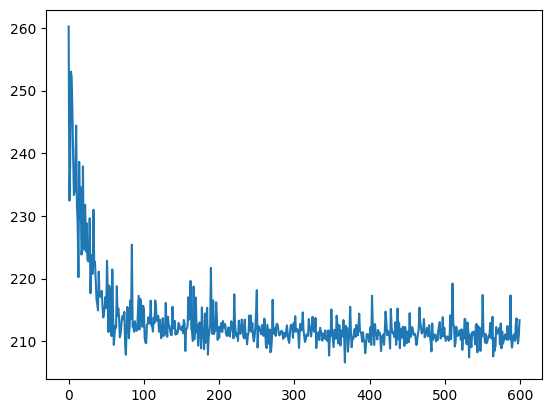

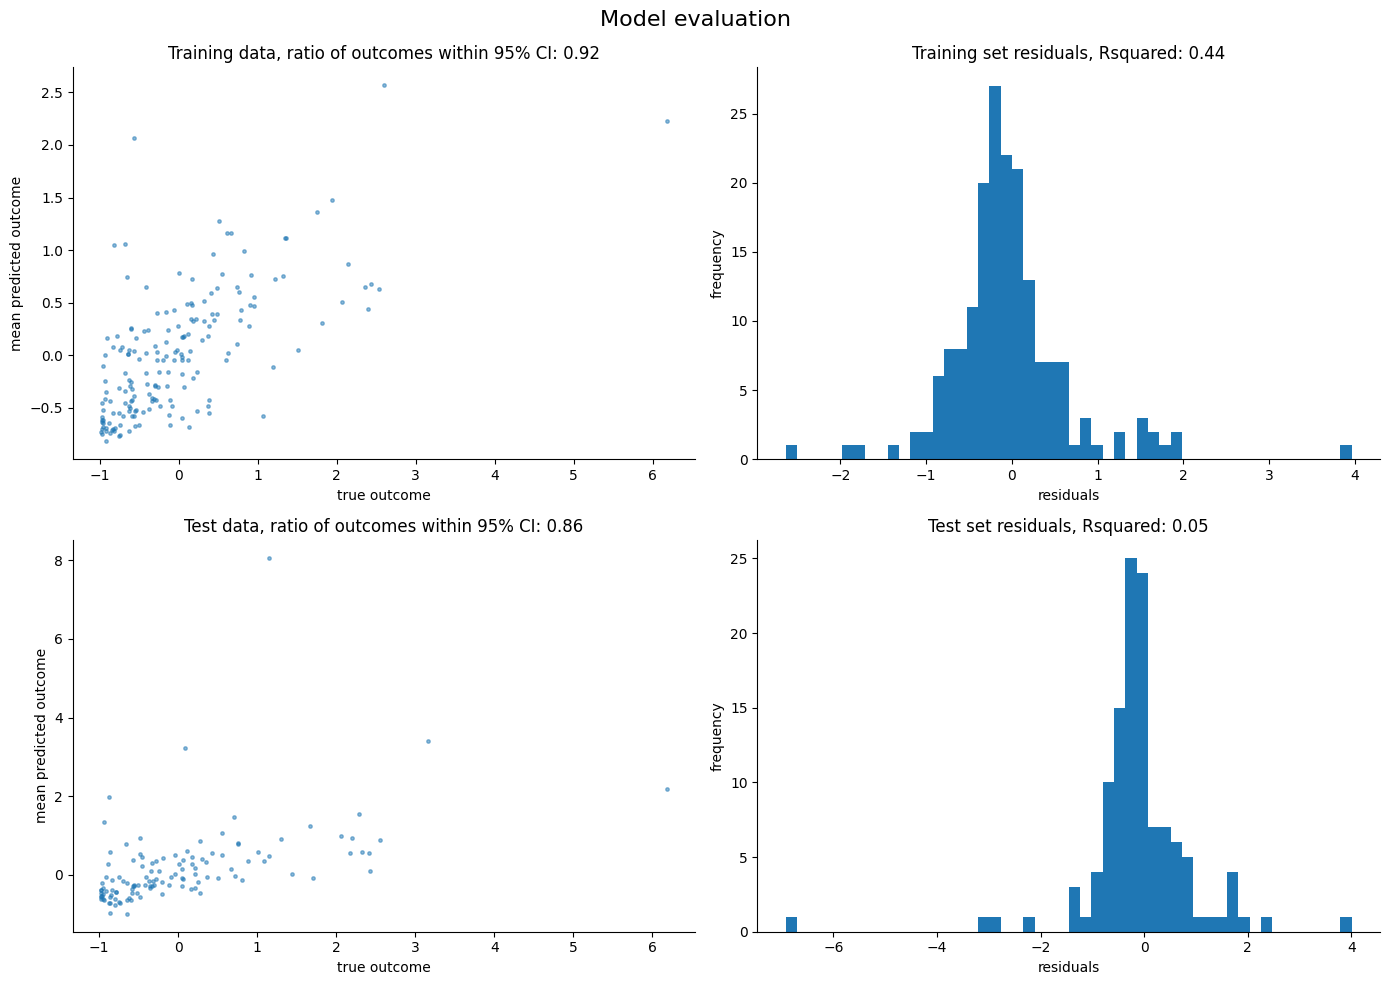

{'mae_train': 0.46067970991134644,
 'mae_test': 0.6316331624984741,
 'rsquared_train': tensor(0.4426),
 'rsquared_test': tensor(0.0462),
 'coverage_train': 0.9171270728111267,
 'coverage_test': 0.8595041036605835}

In [9]:
#drop month

kwarg_names = {
    "categorical": ["zone_id", "past_reform"],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)